In [1]:
class paquete:     
    def __init__(self, nombre, unidades):         
        self.nombre = nombre        
        self.unidades = unidades


### Algoritmo greedy

In [2]:
def busqueda_binaria_en_orden_desendiente_con_indice(arr, indice, unidades_restantes):
    inicio = indice
    fin = len(arr) - 1
    unidad_max = None

    while inicio <= fin:
        mid = (inicio + fin) // 2

        if arr[mid] == unidades_restantes:
            return arr[mid]

        if arr[mid] > unidades_restantes:
            unidad_max = arr[mid]
            inicio = mid + 1
        else:
            fin = mid - 1

    return unidad_max



In [3]:
def operacion(dict_con_nombre_productos, soborno, incautado,incautado_total = 0):
    indice = 0
    dict_con_nombre_productos[soborno.nombre].sort(reverse=True)
    while dict_con_nombre_productos[soborno.nombre][indice] + incautado_total < soborno.unidades:
        if soborno.nombre not in incautado:
            incautado[soborno.nombre] = []    
        primer_unidad = dict_con_nombre_productos[soborno.nombre][indice]   
        incautado[soborno.nombre].append(primer_unidad)
        incautado_total += primer_unidad
        indice+=1

    unidad_max = busqueda_binaria_en_orden_desendiente_con_indice(dict_con_nombre_productos[soborno.nombre], indice,soborno.unidades- incautado_total) #O(log n) siendo n la cantidad de unidades de cada producto
    if soborno.nombre not in incautado:
        incautado[soborno.nombre] = []
    incautado[soborno.nombre].append(unidad_max) ## O(1)
    incautado_total += unidad_max
    return incautado  


In [4]:

def alg_greedy(productos,sobornos): 
    dict_con_nombre_productos = {}
    for producto in productos:  #O(n)
        if producto.nombre not in dict_con_nombre_productos:
            dict_con_nombre_productos[producto.nombre] = []
        dict_con_nombre_productos[producto.nombre].append(producto.unidades)  
    incautado = {}
    for soborno in sobornos:
        operacion(dict_con_nombre_productos, soborno, incautado)
    return incautado  


### Tests para algoritmo greedy

En dichos tests decidimos probar por cada 

In [5]:
import random

unidades_cigarillos = [3,5,8,10,13,15]
productos = []
unidades_coca = [12,11,7,15,2,6]
for unidad in unidades_coca:
    productos.append(paquete("coca",unidad))
for unidad in unidades_cigarillos:
    productos.append(paquete("cigarrillos", unidad))


class tests:
    def check_assert(self, test_name, test_result):
        try:
            assert test_result
            print(f"{test_name} \u2713")
        except AssertionError:
            print(f"{test_name} \u2717")

    def test_soborno_con_exactos_13_cigarrillos(self):
        soborno_cigarrillos = paquete("cigarrillos", 13)
        incautado = alg_greedy(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_exactos_13_cigarrillos", 
                           len(incautado["cigarrillos"]) == 1 and incautado["cigarrillos"][0] == 13)

    def test_soborno_con_exactos_3_cigarrillos(self):
        soborno_cigarrillos = paquete("cigarrillos", 3)
        incautado = alg_greedy(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_exactos_3_cigarrillos",
                           len(incautado["cigarrillos"]) == 1 and incautado["cigarrillos"][0] == 3)

    def test_soborno_con_menos_cigarrillos(self):
        soborno_cigarrillos = paquete("cigarrillos", 2)
        incautado = alg_greedy(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_menos_cigarrillos_1",
                           len(incautado["cigarrillos"]) == 1 and incautado["cigarrillos"][0] == 3)

        soborno_cigarrillos = paquete("cigarrillos", 7)
        incautado = alg_greedy(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_menos_cigarrillos_2",
                           len(incautado["cigarrillos"]) == 1 and incautado["cigarrillos"][0] == 8)

        soborno_cigarrillos = paquete("cigarrillos", 14)
        incautado = alg_greedy(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_menos_cigarrillos_3",
                           len(incautado["cigarrillos"]) == 1 and incautado["cigarrillos"][0] == 15)
    
    def test_soborno_con_mas_cigarrillos_pero_suma_de_dos_exacta(self):
        soborno_cigarrillos = paquete("cigarrillos", 18)
        incautado = alg_greedy(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_dos_exacta_1",
                           len(incautado["cigarrillos"]) == 2 and incautado["cigarrillos"] == [15, 3])

        soborno_cigarrillos = paquete("cigarrillos", 25)
        incautado = alg_greedy(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_dos_exacta_2",
                           len(incautado["cigarrillos"]) == 2 and incautado["cigarrillos"] == [15,10])
        
        soborno_cigarrillos = paquete("cigarrillos", 28)
        incautado = alg_greedy(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_dos_exacta_3",
                           len(incautado["cigarrillos"]) == 2 and incautado["cigarrillos"] == [15,13])
        soborno_cigarrillos = paquete("cigarrillos", 23)
        incautado = alg_greedy(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_dos_exacta_4",
                           len(incautado["cigarrillos"]) == 2 and incautado["cigarrillos"] == [15,8])

    def test_soborno_con_mas_cigarrillos_pero_suma_de_dos_no_exacta(self):

        soborno_cigarrillos = paquete("cigarrillos", 19)
        incautado = alg_greedy(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_dos_no_exacta_1",
                           len(incautado["cigarrillos"]) == 2 and incautado["cigarrillos"] == [15,5])
        
        soborno_cigarrillos = paquete("cigarrillos", 26)
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_dos_no_exacta_2",
                           len(incautado["cigarrillos"]) == 2 and incautado["cigarrillos"] == [15,13])
        

        soborno_cigarrillos = paquete("cigarrillos", 27)
        incautado = alg_greedy(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_dos_no_exacta_3",
                           len(incautado["cigarrillos"]) == 2 and incautado["cigarrillos"] == [15,13])
        
        soborno_cigarrillos = paquete("cigarrillos", 21)
        incautado = alg_greedy(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_dos_no_exacta_4",
                           len(incautado["cigarrillos"]) == 2 and incautado["cigarrillos"] == [15,8])

    def test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_exacta(self):

        soborno_cigarrillos = paquete("cigarrillos", 31)
        incautado = alg_greedy(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_exacta_1",
                           len(incautado["cigarrillos"]) == 3 and incautado["cigarrillos"] == [10,13,3])

        soborno_cigarrillos = paquete("cigarrillos", 36)
        incautado = alg_greedy(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_exacta_2",
                           len(incautado["cigarrillos"]) == 3 and incautado["cigarrillos"] == [15,13,8])
        

        soborno_cigarrillos = paquete("cigarrillos", 41)
        incautado = alg_greedy(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_exacta_3",
                           len(incautado["cigarrillos"]) == 4 and incautado["cigarrillos"] == [15,13,10,3])

        soborno_cigarrillos = paquete("cigarrillos", 46)
        incautado = alg_greedy(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_exacta_4",
                           len(incautado["cigarrillos"]) == 4 and incautado["cigarrillos"] == [15,13,10,8])

        soborno_cigarrillos = paquete("cigarrillos", 51)
        incautado = alg_greedy(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_exacta_5",
                           len(incautado["cigarrillos"]) == 5 and incautado["cigarrillos"] == [15,13,10,8,5])


    def test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_no_exacta(self):

        soborno_cigarrillos = paquete("cigarrillos", 29)
        incautado = alg_greedy(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_no_exacta_1",
                           len(incautado["cigarrillos"]) == 3 and incautado["cigarrillos"] == [15,13,3])
        soborno_cigarrillos = paquete("cigarrillos", 34)
        incautado = alg_greedy(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_no_exacta_2",
                           len(incautado["cigarrillos"]) == 3 and incautado["cigarrillos"] == [15,13,8])

        soborno_cigarrillos = paquete("cigarrillos", 40)
        incautado = alg_greedy(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_no_exacta_3",
                           len(incautado["cigarrillos"]) == 4 and incautado["cigarrillos"] == [15,13,10,3])
        
        soborno_cigarrillos = paquete("cigarrillos", 44)
        incautado = alg_greedy(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_no_exacta_4",
                           len(incautado["cigarrillos"]) == 4 and incautado["cigarrillos"] == [15,13,10,8])
    
        soborno_cigarrillos = paquete("cigarrillos", 50)
        incautado = alg_greedy(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_no_exacta_5",
                           len(incautado["cigarrillos"]) == 5 and incautado["cigarrillos"] == [15,13,10,8,5])
    
    def test_soborno_con_dos_o_mas_productos(self):
        soborno_cigarrillos = paquete("cigarrillos", 29)
        soborno_cocas = paquete("coca",7)
        incautado = alg_greedy(productos, [soborno_cigarrillos,soborno_cocas])
        self.check_assert("test_soborno_con_dos_o_mas_productos_1",
                           len(incautado["cigarrillos"]) == 3 and incautado["cigarrillos"] == [15,13,3]
                           and len(incautado["coca"]) == 1 and incautado["coca"] == [7])
        soborno_cigarrillos = paquete("cigarrillos", 34)
        soborno_cocas = paquete("coca",21)
        incautado = alg_greedy(productos, [soborno_cigarrillos,soborno_cocas])
        self.check_assert("test_soborno_con_dos_o_mas_productos_2",
                           len(incautado["cigarrillos"]) == 3 and incautado["cigarrillos"] == [15,13,8]
                           and len(incautado["coca"]) == 2 and incautado["coca"] == [15,6])


In [6]:
tests = tests()
tests.test_soborno_con_exactos_13_cigarrillos()
tests.test_soborno_con_exactos_3_cigarrillos()
tests.test_soborno_con_menos_cigarrillos()
tests.test_soborno_con_mas_cigarrillos_pero_suma_de_dos_exacta()
tests.test_soborno_con_mas_cigarrillos_pero_suma_de_dos_no_exacta()
tests.test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_exacta()
tests.test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_no_exacta()
tests.test_soborno_con_dos_o_mas_productos()
## SE DEBERIA RECIBIR UN TICK POR TODAS LAS OPERACIONES




test_soborno_con_exactos_13_cigarrillos ✓
test_soborno_con_exactos_3_cigarrillos ✓
test_soborno_con_menos_cigarrillos_1 ✓
test_soborno_con_menos_cigarrillos_2 ✓
test_soborno_con_menos_cigarrillos_3 ✓
test_soborno_con_mas_cigarrillos_pero_suma_de_dos_exacta_1 ✓
test_soborno_con_mas_cigarrillos_pero_suma_de_dos_exacta_2 ✓
test_soborno_con_mas_cigarrillos_pero_suma_de_dos_exacta_3 ✓
test_soborno_con_mas_cigarrillos_pero_suma_de_dos_exacta_4 ✓
test_soborno_con_mas_cigarrillos_pero_suma_de_dos_no_exacta_1 ✓
test_soborno_con_mas_cigarrillos_pero_suma_de_dos_no_exacta_2 ✗
test_soborno_con_mas_cigarrillos_pero_suma_de_dos_no_exacta_3 ✓
test_soborno_con_mas_cigarrillos_pero_suma_de_dos_no_exacta_4 ✓
test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_exacta_1 ✗
test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_exacta_2 ✓
test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_exacta_3 ✓
test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_exacta_4 ✓
test_soborno_con_mas_cigarri

### Algoritmo Programacion dinamica

In [7]:
import numpy as np

In [8]:
def algoritmo_prog_dinamica(productos,sobornos):
    dict_con_nombre_productos = {}
    for producto in productos:  #O(n)
        if producto.nombre not in dict_con_nombre_productos:
            dict_con_nombre_productos[producto.nombre] = []
        dict_con_nombre_productos[producto.nombre].append(producto.unidades)  
    incautado = {}
    for soborno in sobornos:
        unidades_producto = operacion_dinamica(dict_con_nombre_productos[soborno.nombre], soborno)
        incautado[soborno.nombre]= (unidades_producto)
    return incautado


In [9]:
def operacion_dinamica(unidades_producto_ordenado,soborno):
    #unidades_producto_ordenado = sorted(unidades_producto)
    beneficios = unidades_producto_ordenado.copy()
    sum_productos = np.sum(unidades_producto_ordenado)
    W = sum_productos - soborno.unidades 
    n = len(unidades_producto_ordenado)
    m = [[0 for j in range(W+1)] for i in range(n+1)]
    for i in range(1, n+1):
        for j in range(W+1):
            if unidades_producto_ordenado[i-1] > j:
                m[i][j] = m[i-1][j]
            else:
                m[i][j] = max(m[i-1][j], m[i-1][j-unidades_producto_ordenado[i-1]] + beneficios[i-1])
    indices_items_que_nos_quedan = []
    for i in range(n, 0, -1):
        if m[i][j] != m[i-1][j]:
            indices_items_que_nos_quedan.append(i-1)
            j -= unidades_producto_ordenado[i-1]
    incautados = []
    for i in range(len(unidades_producto_ordenado)):
        if i not in indices_items_que_nos_quedan:
            incautados.append(unidades_producto_ordenado[i])
    return incautados

### Tests para correcto funcionamiento dinamico

In [10]:
import random

unidades_cigarillos = [3,5,8,10,13,15]
productos = []
unidades_coca = [12,11,7,15,2,6]
for unidad in unidades_coca:
    productos.append(paquete("coca",unidad))
for unidad in unidades_cigarillos:
    productos.append(paquete("cigarrillos", unidad))


class tests:
    def check_assert(self, test_name, test_result):
        try:
            assert test_result
            print(f"{test_name} \u2713")
        except AssertionError:
            print(f"{test_name} \u2717")

    def test_soborno_con_exactos_13_cigarrillos(self):
        soborno_cigarrillos = paquete("cigarrillos", 13)
        incautado = algoritmo_prog_dinamica(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_exactos_13_cigarrillos", 
                           len(incautado["cigarrillos"]) == 1 and incautado["cigarrillos"][0] == 13)

    def test_soborno_con_exactos_3_cigarrillos(self):
        soborno_cigarrillos = paquete("cigarrillos", 3)
        incautado = algoritmo_prog_dinamica(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_exactos_3_cigarrillos",
                           len(incautado["cigarrillos"]) == 1 and incautado["cigarrillos"][0] == 3)

    def test_soborno_con_menos_cigarrillos(self):
        soborno_cigarrillos = paquete("cigarrillos", 2)
        incautado = algoritmo_prog_dinamica(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_menos_cigarrillos_1",
                           len(incautado["cigarrillos"]) == 1 and incautado["cigarrillos"][0] == 3)

        soborno_cigarrillos = paquete("cigarrillos", 7)
        incautado = algoritmo_prog_dinamica(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_menos_cigarrillos_2",
                           len(incautado["cigarrillos"]) == 1 and incautado["cigarrillos"][0] == 8)

        soborno_cigarrillos = paquete("cigarrillos", 14)
        incautado = algoritmo_prog_dinamica(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_menos_cigarrillos_3",
                           len(incautado["cigarrillos"]) == 1 and incautado["cigarrillos"][0] == 15)
    
    def test_soborno_con_mas_cigarrillos_pero_suma_de_dos_exacta(self):
        soborno_cigarrillos = paquete("cigarrillos", 18)
        incautado = algoritmo_prog_dinamica(productos, [soborno_cigarrillos])
        
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_dos_exacta_1",
                           len(incautado["cigarrillos"]) == 2 and incautado["cigarrillos"] == [3, 15])
        

        soborno_cigarrillos = paquete("cigarrillos", 16)
        incautado = algoritmo_prog_dinamica(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_dos_exacta_2",
                           len(incautado["cigarrillos"]) == 2 and incautado["cigarrillos"] == [3,13])
        
        
        soborno_cigarrillos = paquete("cigarrillos", 23)
        incautado = algoritmo_prog_dinamica(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_dos_exacta_3",
                           len(incautado["cigarrillos"]) == 2 and incautado["cigarrillos"] == [8,15])
        
        soborno_cigarrillos = paquete("cigarrillos", 11)
        incautado = algoritmo_prog_dinamica(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_dos_exacta_4",
                           len(incautado["cigarrillos"]) == 2 and incautado["cigarrillos"] == [3,8])

    def test_soborno_con_mas_cigarrillos_pero_suma_de_dos_no_exacta(self):

        soborno_cigarrillos = paquete("cigarrillos", 19)
        incautado = algoritmo_prog_dinamica(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_dos_no_exacta_1",
                           len(incautado["cigarrillos"]) == 2 and incautado["cigarrillos"] == [5,15])
        
        soborno_cigarrillos = paquete("cigarrillos", 17)
        incautado = algoritmo_prog_dinamica(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_dos_no_exacta_2",
                           len(incautado["cigarrillos"]) == 2 and incautado["cigarrillos"] == [3,15])

        soborno_cigarrillos = paquete("cigarrillos", 27)
        incautado = algoritmo_prog_dinamica(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_dos_no_exacta_3",
                           len(incautado["cigarrillos"]) == 2 and incautado["cigarrillos"] == [13, 15])
        
        soborno_cigarrillos = paquete("cigarrillos", 22)
        incautado = algoritmo_prog_dinamica(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_dos_no_exacta_4",
                           len(incautado["cigarrillos"]) == 2 and incautado["cigarrillos"] == [8,15])

    def test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_exacta(self):

        soborno_cigarrillos = paquete("cigarrillos", 29)
        incautado = algoritmo_prog_dinamica(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_exacta_1",
                           np.sum(incautado["cigarrillos"])== 29)

        soborno_cigarrillos = paquete("cigarrillos", 30)
        incautado = algoritmo_prog_dinamica(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_exacta_2",
                           np.sum(incautado["cigarrillos"])== 30)

        soborno_cigarrillos = paquete("cigarrillos", 26)
        incautado = algoritmo_prog_dinamica(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_exacta_3",
                           np.sum(incautado["cigarrillos"])== 26)
        

        soborno_cigarrillos = paquete("cigarrillos", 36)
        incautado = algoritmo_prog_dinamica(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_exacta_4",
                           np.sum(incautado["cigarrillos"])== 36)
        

        soborno_cigarrillos = paquete("cigarrillos", 41)
        incautado = algoritmo_prog_dinamica(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_exacta_5",
                           np.sum(incautado["cigarrillos"])== 41)


    def test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_no_exacta(self):

        soborno_cigarrillos = paquete("cigarrillos", 33)
        incautado = algoritmo_prog_dinamica(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_no_exacta_1",
                           len(incautado["cigarrillos"]) == 3 and incautado["cigarrillos"] == [5,13,15])

        soborno_cigarrillos = paquete("cigarrillos", 35)
        incautado = algoritmo_prog_dinamica(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_no_exacta_2",
                           len(incautado["cigarrillos"]) == 3 and incautado["cigarrillos"] == [8,13,15])

        soborno_cigarrillos = paquete("cigarrillos", 40)
        incautado = algoritmo_prog_dinamica(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_no_exacta_3",
                           len(incautado["cigarrillos"]) == 4 and incautado["cigarrillos"] == [3,10,13,15])
        
        soborno_cigarrillos = paquete("cigarrillos", 45)
        incautado = algoritmo_prog_dinamica(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_no_exacta_4",
                           len(incautado["cigarrillos"]) == 4 and incautado["cigarrillos"] == [8,10,13,15])
    
        soborno_cigarrillos = paquete("cigarrillos", 50)
        incautado = algoritmo_prog_dinamica(productos, [soborno_cigarrillos])
        self.check_assert("test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_no_exacta_5",
                           len(incautado["cigarrillos"]) == 5 and incautado["cigarrillos"] == [5,8,10,13,15])
    def test_soborno_con_dos_o_mas_productos(self):
        soborno_cigarrillos = paquete("cigarrillos", 29)
        soborno_cocas = paquete("coca",7)
        incautado = algoritmo_prog_dinamica(productos, [soborno_cigarrillos,soborno_cocas])
        self.check_assert("test_soborno_con_dos_o_mas_productos_1",
                           len(incautado["cigarrillos"]) == 4 and incautado["cigarrillos"] == [3,5,8,13]
                           and len(incautado["coca"]) == 1 and incautado["coca"] == [7])
        soborno_cigarrillos = paquete("cigarrillos", 34)
        soborno_cocas = paquete("coca",21)
        incautado = algoritmo_prog_dinamica(productos, [soborno_cigarrillos,soborno_cocas])
        self.check_assert("test_soborno_con_dos_o_mas_productos_2",
                           len(incautado["cigarrillos"]) == 4 and incautado["cigarrillos"] == [3, 8, 10, 13]
                           and len(incautado["coca"]) == 2 and incautado["coca"] == [15, 6])

In [11]:

tests = tests()
tests.test_soborno_con_exactos_13_cigarrillos()
tests.test_soborno_con_exactos_3_cigarrillos()
tests.test_soborno_con_menos_cigarrillos()
tests.test_soborno_con_mas_cigarrillos_pero_suma_de_dos_exacta()
tests.test_soborno_con_mas_cigarrillos_pero_suma_de_dos_no_exacta()
tests.test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_exacta()
tests.test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_no_exacta()
tests.test_soborno_con_dos_o_mas_productos()

test_soborno_con_exactos_13_cigarrillos ✓
test_soborno_con_exactos_3_cigarrillos ✓
test_soborno_con_menos_cigarrillos_1 ✓
test_soborno_con_menos_cigarrillos_2 ✓
test_soborno_con_menos_cigarrillos_3 ✓
test_soborno_con_mas_cigarrillos_pero_suma_de_dos_exacta_1 ✓
test_soborno_con_mas_cigarrillos_pero_suma_de_dos_exacta_2 ✓
test_soborno_con_mas_cigarrillos_pero_suma_de_dos_exacta_3 ✓
test_soborno_con_mas_cigarrillos_pero_suma_de_dos_exacta_4 ✓
test_soborno_con_mas_cigarrillos_pero_suma_de_dos_no_exacta_1 ✓
test_soborno_con_mas_cigarrillos_pero_suma_de_dos_no_exacta_2 ✓
test_soborno_con_mas_cigarrillos_pero_suma_de_dos_no_exacta_3 ✓
test_soborno_con_mas_cigarrillos_pero_suma_de_dos_no_exacta_4 ✓
test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_exacta_1 ✓
test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_exacta_2 ✓
test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_exacta_3 ✓
test_soborno_con_mas_cigarrillos_pero_suma_de_mas_de_dos_exacta_4 ✓
test_soborno_con_mas_cigarri

### Prueba 2

Decidimos hacer otra prueba mas de optimalidad, donde daria el resultado exacto para todos los numeros que se pueden sumar dentro del arreglo, usando fuerza bruta:

In [12]:
def check_assert(test_name, test_result):
    try:
        assert test_result
        print(f"{test_name} \u2713")
    except AssertionError:
        print(f"{test_name} \u2717")


unidades_cigarillos = [3,5,8,10,13,15]
productos = []
for unidad in unidades_cigarillos:
    productos.append(paquete("cigarrillos", unidad))
for i in range(1 << len(unidades_cigarillos)):
    suma = 0
    for j in range(len(unidades_cigarillos)):
        if i & (1 << j):
            suma += unidades_cigarillos[j]
    soborno_cigarrillos = paquete("cigarrillos", suma)
    incautado = algoritmo_prog_dinamica(productos, [soborno_cigarrillos])
    check_assert(f"chequeo si es optimo con {suma}",np.sum(incautado["cigarrillos"]) == suma)

chequeo si es optimo con 0 ✓
chequeo si es optimo con 3 ✓
chequeo si es optimo con 5 ✓
chequeo si es optimo con 8 ✓
chequeo si es optimo con 8 ✓
chequeo si es optimo con 11 ✓
chequeo si es optimo con 13 ✓
chequeo si es optimo con 16 ✓
chequeo si es optimo con 10 ✓
chequeo si es optimo con 13 ✓
chequeo si es optimo con 15 ✓
chequeo si es optimo con 18 ✓
chequeo si es optimo con 18 ✓
chequeo si es optimo con 21 ✓
chequeo si es optimo con 23 ✓
chequeo si es optimo con 26 ✓
chequeo si es optimo con 13 ✓
chequeo si es optimo con 16 ✓
chequeo si es optimo con 18 ✓
chequeo si es optimo con 21 ✓
chequeo si es optimo con 21 ✓
chequeo si es optimo con 24 ✓
chequeo si es optimo con 26 ✓
chequeo si es optimo con 29 ✓
chequeo si es optimo con 23 ✓
chequeo si es optimo con 26 ✓
chequeo si es optimo con 28 ✓
chequeo si es optimo con 31 ✓
chequeo si es optimo con 31 ✓
chequeo si es optimo con 34 ✓
chequeo si es optimo con 36 ✓
chequeo si es optimo con 39 ✓
chequeo si es optimo con 15 ✓
chequeo si es o

### Programa que utiliza ambos algoritmos

### Prueba 1

En este caso, para un soborno que va en aumento, yendo de 1 hasta la suma de todos los elementos del arreglo, es decir, en el peor de los casos, que el aduanero nos pida toda la cantidad que poseemos, queremos ver cuantas veces el algoritmo greedy es diferente al algoritmo por programacion dinamica, y mostramos un grafico de barras

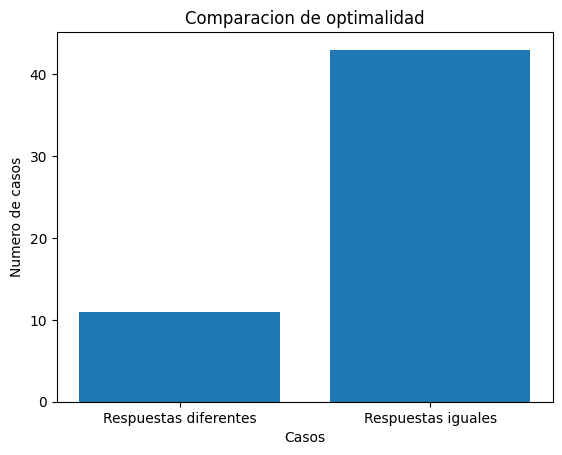

In [15]:
import matplotlib.pyplot as plt
unidades_cigarillos = [3,5,8,10,13,15]
productos = []
for unidad in unidades_cigarillos:
    productos.append(paquete("cigarrillos", unidad))
soborno = np.sum(unidades_cigarillos)
diferentes = 0
iguales = 0
for i in range(soborno):
    soborno_cigarrillos = paquete("cigarrillos", i)
    resp_1 = algoritmo_prog_dinamica(productos, [soborno_cigarrillos])
    resp_2 = alg_greedy(productos, [soborno_cigarrillos])
    if np.sum(resp_1["cigarrillos"]) !=  np.sum(resp_2["cigarrillos"]): 
        diferentes+=1
    else:
        iguales+=1 

plt.bar(['Respuestas diferentes', 'Respuestas iguales'], [diferentes, iguales])
plt.title('Comparacion de optimalidad')
plt.xlabel('Casos')
plt.ylabel('Numero de casos')
plt.show()

Aca podemos ver que en muchos casos el algoritmo greedy no da la solucion optima, esto va en aumento a medida que cambiamos el las unidades que se tiene

### Prueba 2

Como dijimos antes, si aumentamos la cantidad de productos que se tiene, se puede ver que la optimalidad usando el algoritmo greedy es peor

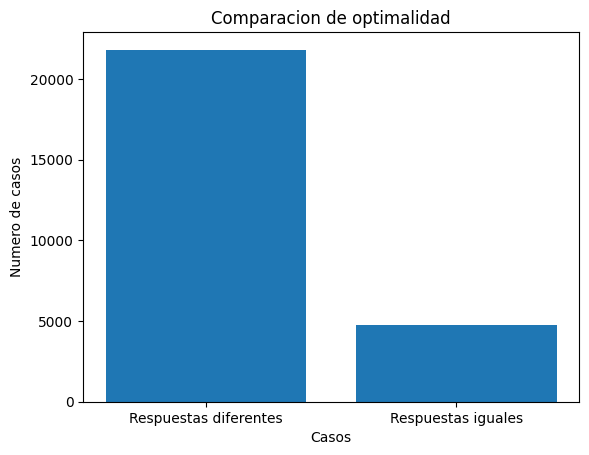

In [16]:
import matplotlib.pyplot as plt

unidades_cigarillos = []
for i in range(100):
    unidades_cigarillos.append(random.randint(1, 500))

productos = []
for unidad in unidades_cigarillos:
    productos.append(paquete("cigarrillos", unidad))
soborno = np.sum(unidades_cigarillos)
diferentes = 0
iguales = 0
for i in range(soborno):
    soborno_cigarrillos = paquete("cigarrillos", i)
    resp_1 = algoritmo_prog_dinamica(productos, [soborno_cigarrillos])
    resp_2 = alg_greedy(productos, [soborno_cigarrillos])
    if np.sum(resp_1["cigarrillos"]) !=  np.sum(resp_2["cigarrillos"]): 
        diferentes+=1
    else:
        iguales+=1 

plt.bar(['Respuestas diferentes', 'Respuestas iguales'], [diferentes, iguales])
plt.title('Comparacion de optimalidad')
plt.xlabel('Casos')
plt.ylabel('Numero de casos')
plt.show()

### Prueba 3

In [0]:
import matplotlib.pyplot as plt

unidades_cigarillos = []
for i in range(100):
    unidades_cigarillos.append(random.randint(1, 500))
unidades_coca = []
for i in range(100):
    unidades_coca.append(random.randint(1, 500))


productos = []
for unidad in unidades_cigarillos:
    productos.append(paquete("cigarrillos", unidad))

soborno_cigarrillos = np.sum(unidades_cigarillos)

for unidad in unidades_coca:
    productos.append(paquete("coca", unidad))

soborno_coca = np.sum(unidades_coca)
diferentes = 0
iguales = 0
for i in range(soborno_cigarrillos):
    soborno_cigarrillos = paquete("cigarrillos", i)
    resp_1 = algoritmo_prog_dinamica(productos, [soborno_cigarrillos])
    resp_2 = alg_greedy(productos, [soborno_cigarrillos])
    if np.sum(resp_1["cigarrillos"]) !=  np.sum(resp_2["cigarrillos"]): 
        diferentes+=1
    else:
        iguales+=1 

for i in range(soborno_coca):
    soborno_i_coca = paquete("coca", i)
    resp_1 = algoritmo_prog_dinamica(productos, [soborno_i_coca])
    resp_2 = alg_greedy(productos, [soborno_i_coca])
    if np.sum(resp_1["coca"]) !=  np.sum(resp_2["coca"]): 
        diferentes+=1
    else:
        iguales+=1 

plt.bar(['Respuestas diferentes', 'Respuestas iguales'], [diferentes, iguales])
plt.title('Comparacion de optimalidad')
plt.xlabel('Casos')
plt.ylabel('Numero de casos')
plt.show()

KeyboardInterrupt: 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ce4f0774-4d00-43aa-a62b-01f4fb127c2a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>